<a href="https://colab.research.google.com/github/Samesh16/lpr/blob/master/rgb_to_greyscale_by_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ray numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 MB 8.9 MB/s eta 0:00:00


In [ ]:
import ray
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
ray.init()

2024-11-08 14:20:54,636	INFO worker.py:1816 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.38.0


In [ ]:
image = cv2.imread("/content/WhatsApp Image 2024-11-08 at 20.49.54_f6d138b1.jpg")  # Replace 'your_image.jpg' with the path to your image
if image is None:
    raise FileNotFoundError("Image not found! Please check the file path.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
@ray.remote
def svd_greyscale_conversion(channel):
    # Perform SVD
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    # Reconstruct the matrix with a limited number of singular values
    k = min(50, len(S))  # Adjust 'k' to control the level of detail
    S = np.diag(S[:k])
    return np.dot(U[:, :k], np.dot(S, Vt[:k, :]))

In [ ]:
channels = [image[:, :, i] for i in range(3)]


In [ ]:
processed_channels = ray.get([svd_greyscale_conversion.remote(ch) for ch in channels])


2024-11-08 15:21:30,151	INFO worker.py:1816 -- Started a local Ray instance.


In [ ]:
gray_image = sum(processed_channels) / 3

In [ ]:
gray_image = (gray_image - gray_image.min()) / (gray_image.max() - gray_image.min()) * 255
gray_image = gray_image.astype(np.uint8)

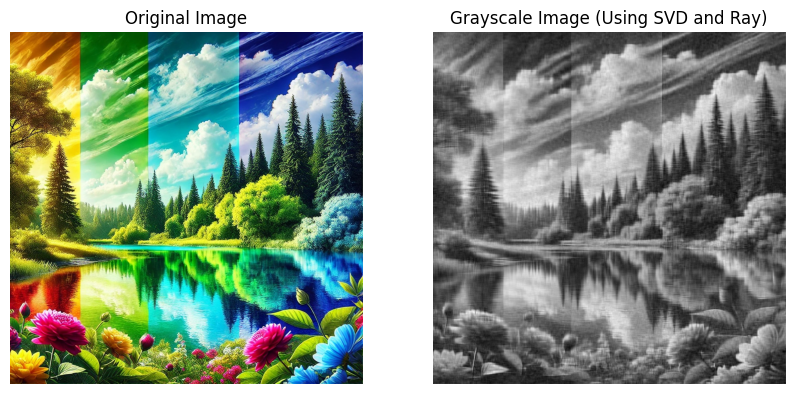

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grayscale Image (Using SVD and Ray)")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

plt.show()

In [ ]:
ray.shutdown()